In [17]:
import matplotlib.pyplot as plt
import pandas as pd
 
df = pd.read_csv("nigerian-songs.csv")#以pandas库的read_csv函数读取csv文件
df.head()#查看前5行数据


,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

In [19]:
df.describe() 

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


查看数据集中数量前5名的艺术家类型数量的条形图

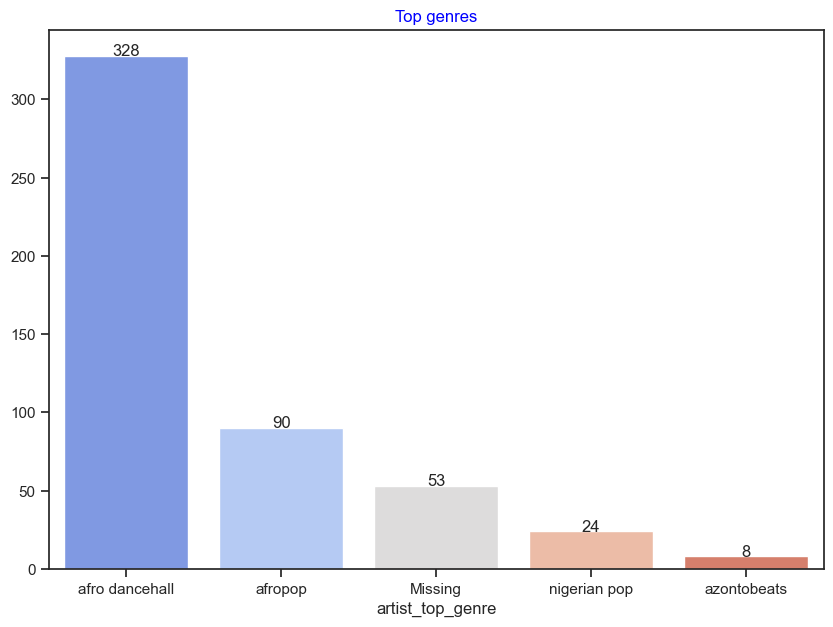

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

top = df['artist_top_genre'].value_counts()  # 对不同音乐家类型进行统计汇总
plt.figure(figsize=(10, 7))  # 设置图表大小
barplot = sns.barplot(x=top[:5].index, y=top[:5].values, hue=top[:5].index, palette="coolwarm", legend=False)
plt.title('Top genres', color='blue')  # 设置条形图标题内容及颜色

# 添加数值标签
for index, value in enumerate(top[:5].values):
    barplot.text(index, value + 0.05, str(value), ha='center')

plt.show()

识别出当前最受欢迎的三大流派

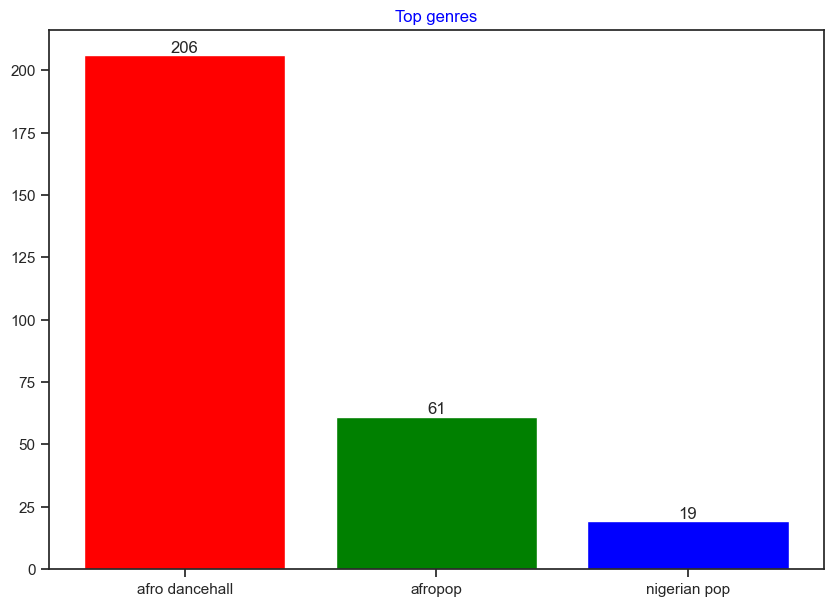

In [21]:
# 筛选特定的音乐类型
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]

# 筛选流行度大于0的数据
df = df[(df['popularity'] > 0)]

# 统计每种音乐类型的数量
top = df['artist_top_genre'].value_counts()

# 创建一个颜色列表，用于为不同的条形图设置颜色
colors = ['red', 'green', 'blue']

# 绘制条形图
plt.figure(figsize=(10, 7))
bars = plt.bar(top.index, top.values, color=colors)

# 在每个条形图上显示具体数值
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# 设置标题
plt.title('Top genres', color='blue')

# 显示图形
plt.show()

强相关性

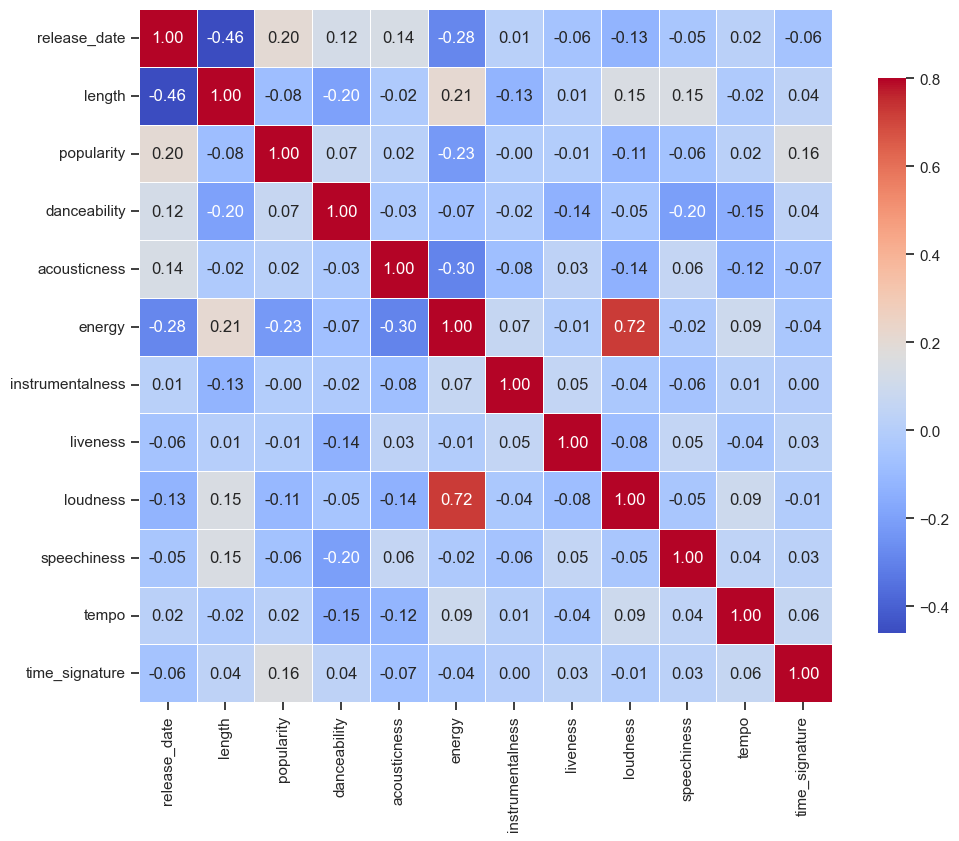

Top 5 strongest correlations:
loudness    energy          0.723946
energy      loudness        0.723946
            length          0.211382
length      energy          0.211382
popularity  release_date    0.203454
dtype: float64


In [22]:
# 计算相关性矩阵
corrmat = df.corr(numeric_only=True)

# 绘制热力图
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .8})

# 显示图形
plt.show()

# 找出最强相关性
# 将相关性矩阵转换为一维数据
corrmat_unstacked = corrmat.unstack()

# 排除自身相关性（值为1的情况）
corrmat_unstacked = corrmat_unstacked[corrmat_unstacked < 1]

# 按相关性值排序
sorted_corr = corrmat_unstacked.sort_values(ascending=False)

# 找出最强相关性的前5对变量
top5_corr = sorted_corr.head(5)

# 打印最强相关性的前5对变量
print("Top 5 strongest correlations:")
print(top5_corr)

查看数据分布数据分布
根据受欢迎程度和可舞性这两个指标进行数据分析，具体方式包括绘制同心圆和散点图。这些图表将帮助我们更直观地理解数据的分布和趋势

同心圆

从图上看，这三种流派在人气和可舞蹈性方面松散地对齐。这说明聚类时比较麻烦

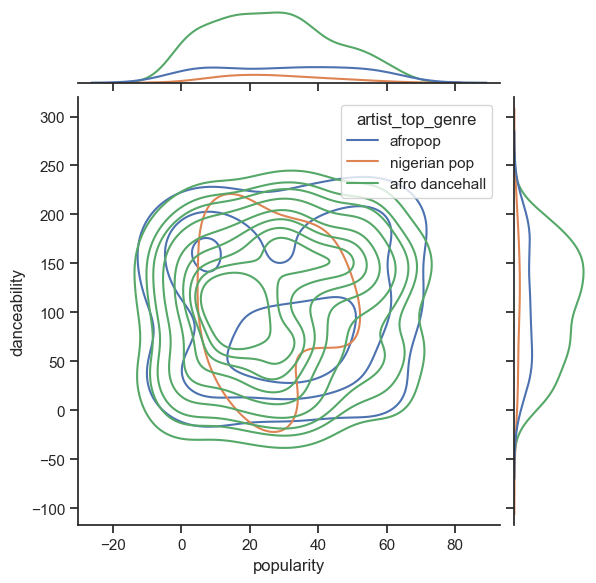

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:, 6:8] = df.iloc[:, 6:8].apply(LabelEncoder().fit_transform)
 
sns.set_theme(style="ticks") 
g = sns.jointplot(
    data=df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

对于混乱的数据，使用箱型图直观的查看数据的分布，从中找出异常数据并进行排除

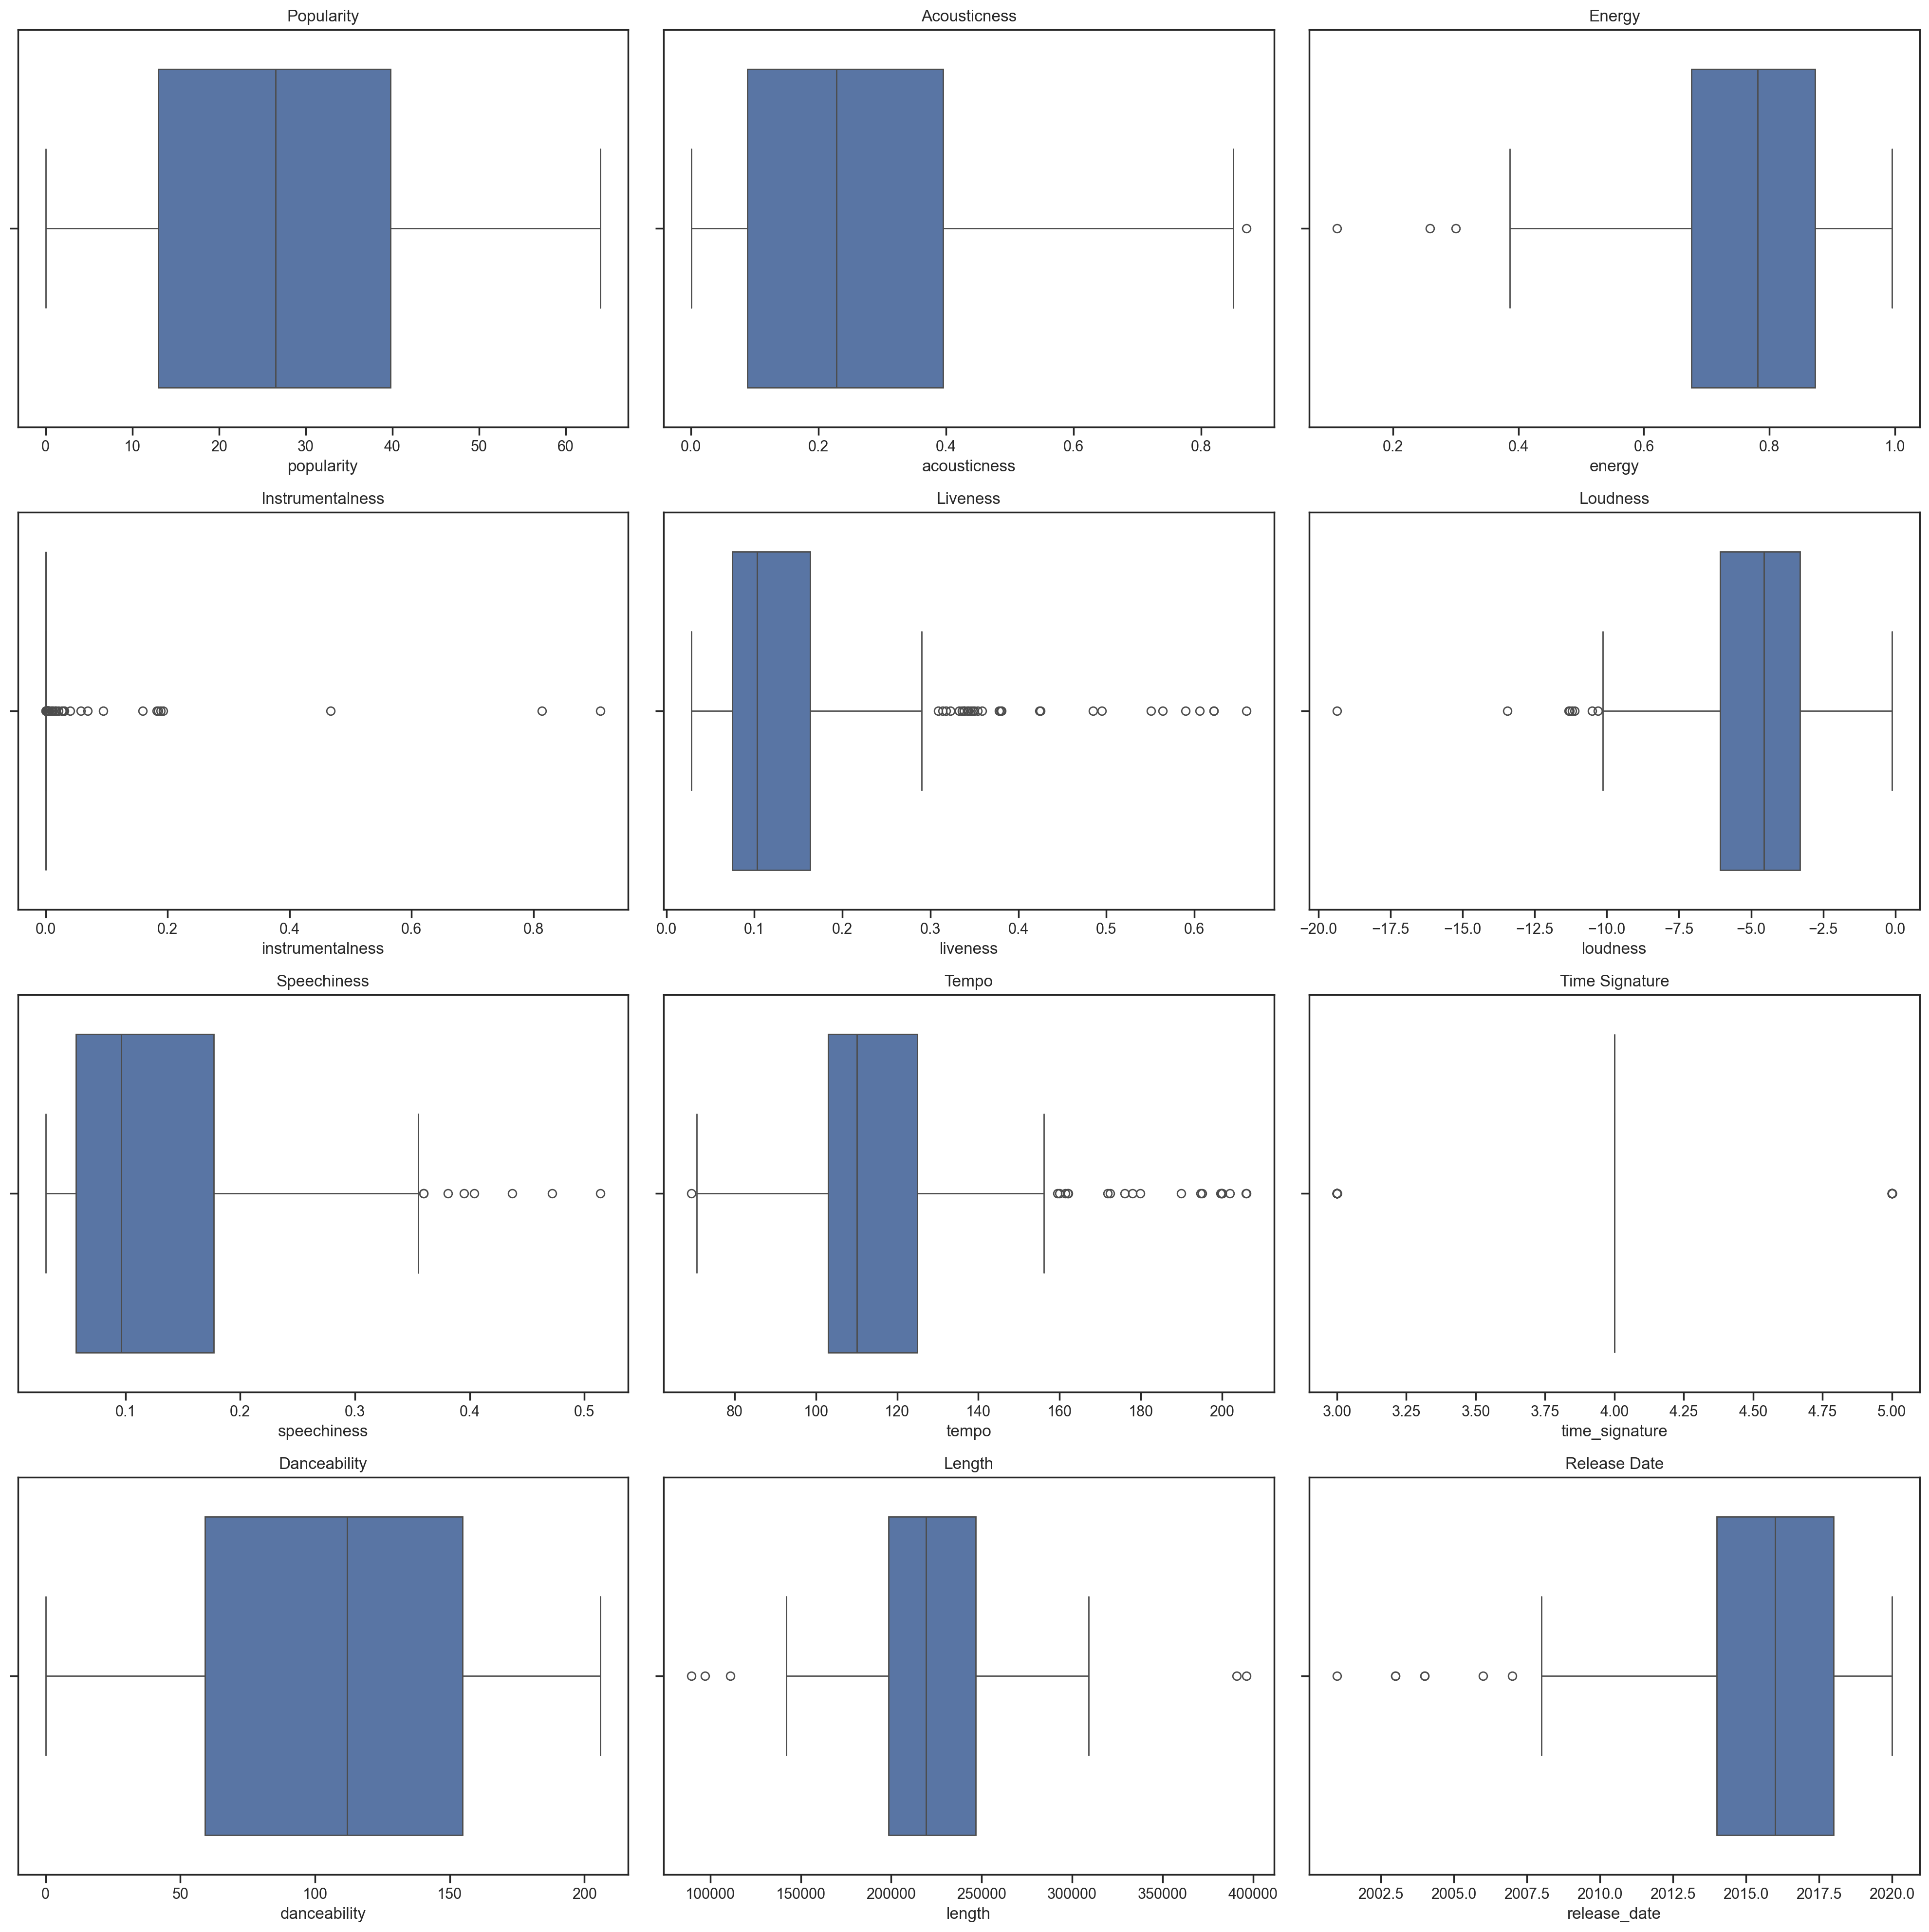

In [24]:
# 绘制箱型图并识别异常值
plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4, 3, 1)
sns.boxplot(x='popularity', data=df)
plt.title('Popularity')

plt.subplot(4, 3, 2)
sns.boxplot(x='acousticness', data=df)
plt.title('Acousticness')

plt.subplot(4, 3, 3)
sns.boxplot(x='energy', data=df)
plt.title('Energy')

plt.subplot(4, 3, 4)
sns.boxplot(x='instrumentalness', data=df)
plt.title('Instrumentalness')

plt.subplot(4, 3, 5)
sns.boxplot(x='liveness', data=df)
plt.title('Liveness')

plt.subplot(4, 3, 6)
sns.boxplot(x='loudness', data=df)
plt.title('Loudness')

plt.subplot(4, 3, 7)
sns.boxplot(x='speechiness', data=df)
plt.title('Speechiness')

plt.subplot(4, 3, 8)
sns.boxplot(x='tempo', data=df)
plt.title('Tempo')

plt.subplot(4, 3, 9)
sns.boxplot(x='time_signature', data=df)
plt.title('Time Signature')

plt.subplot(4, 3, 10)
sns.boxplot(x='danceability', data=df)
plt.title('Danceability')

plt.subplot(4, 3, 11)
sns.boxplot(x='length', data=df)
plt.title('Length')

plt.subplot(4, 3, 12)
sns.boxplot(x='release_date', data=df)
plt.title('Release Date')

plt.tight_layout()
plt.show()


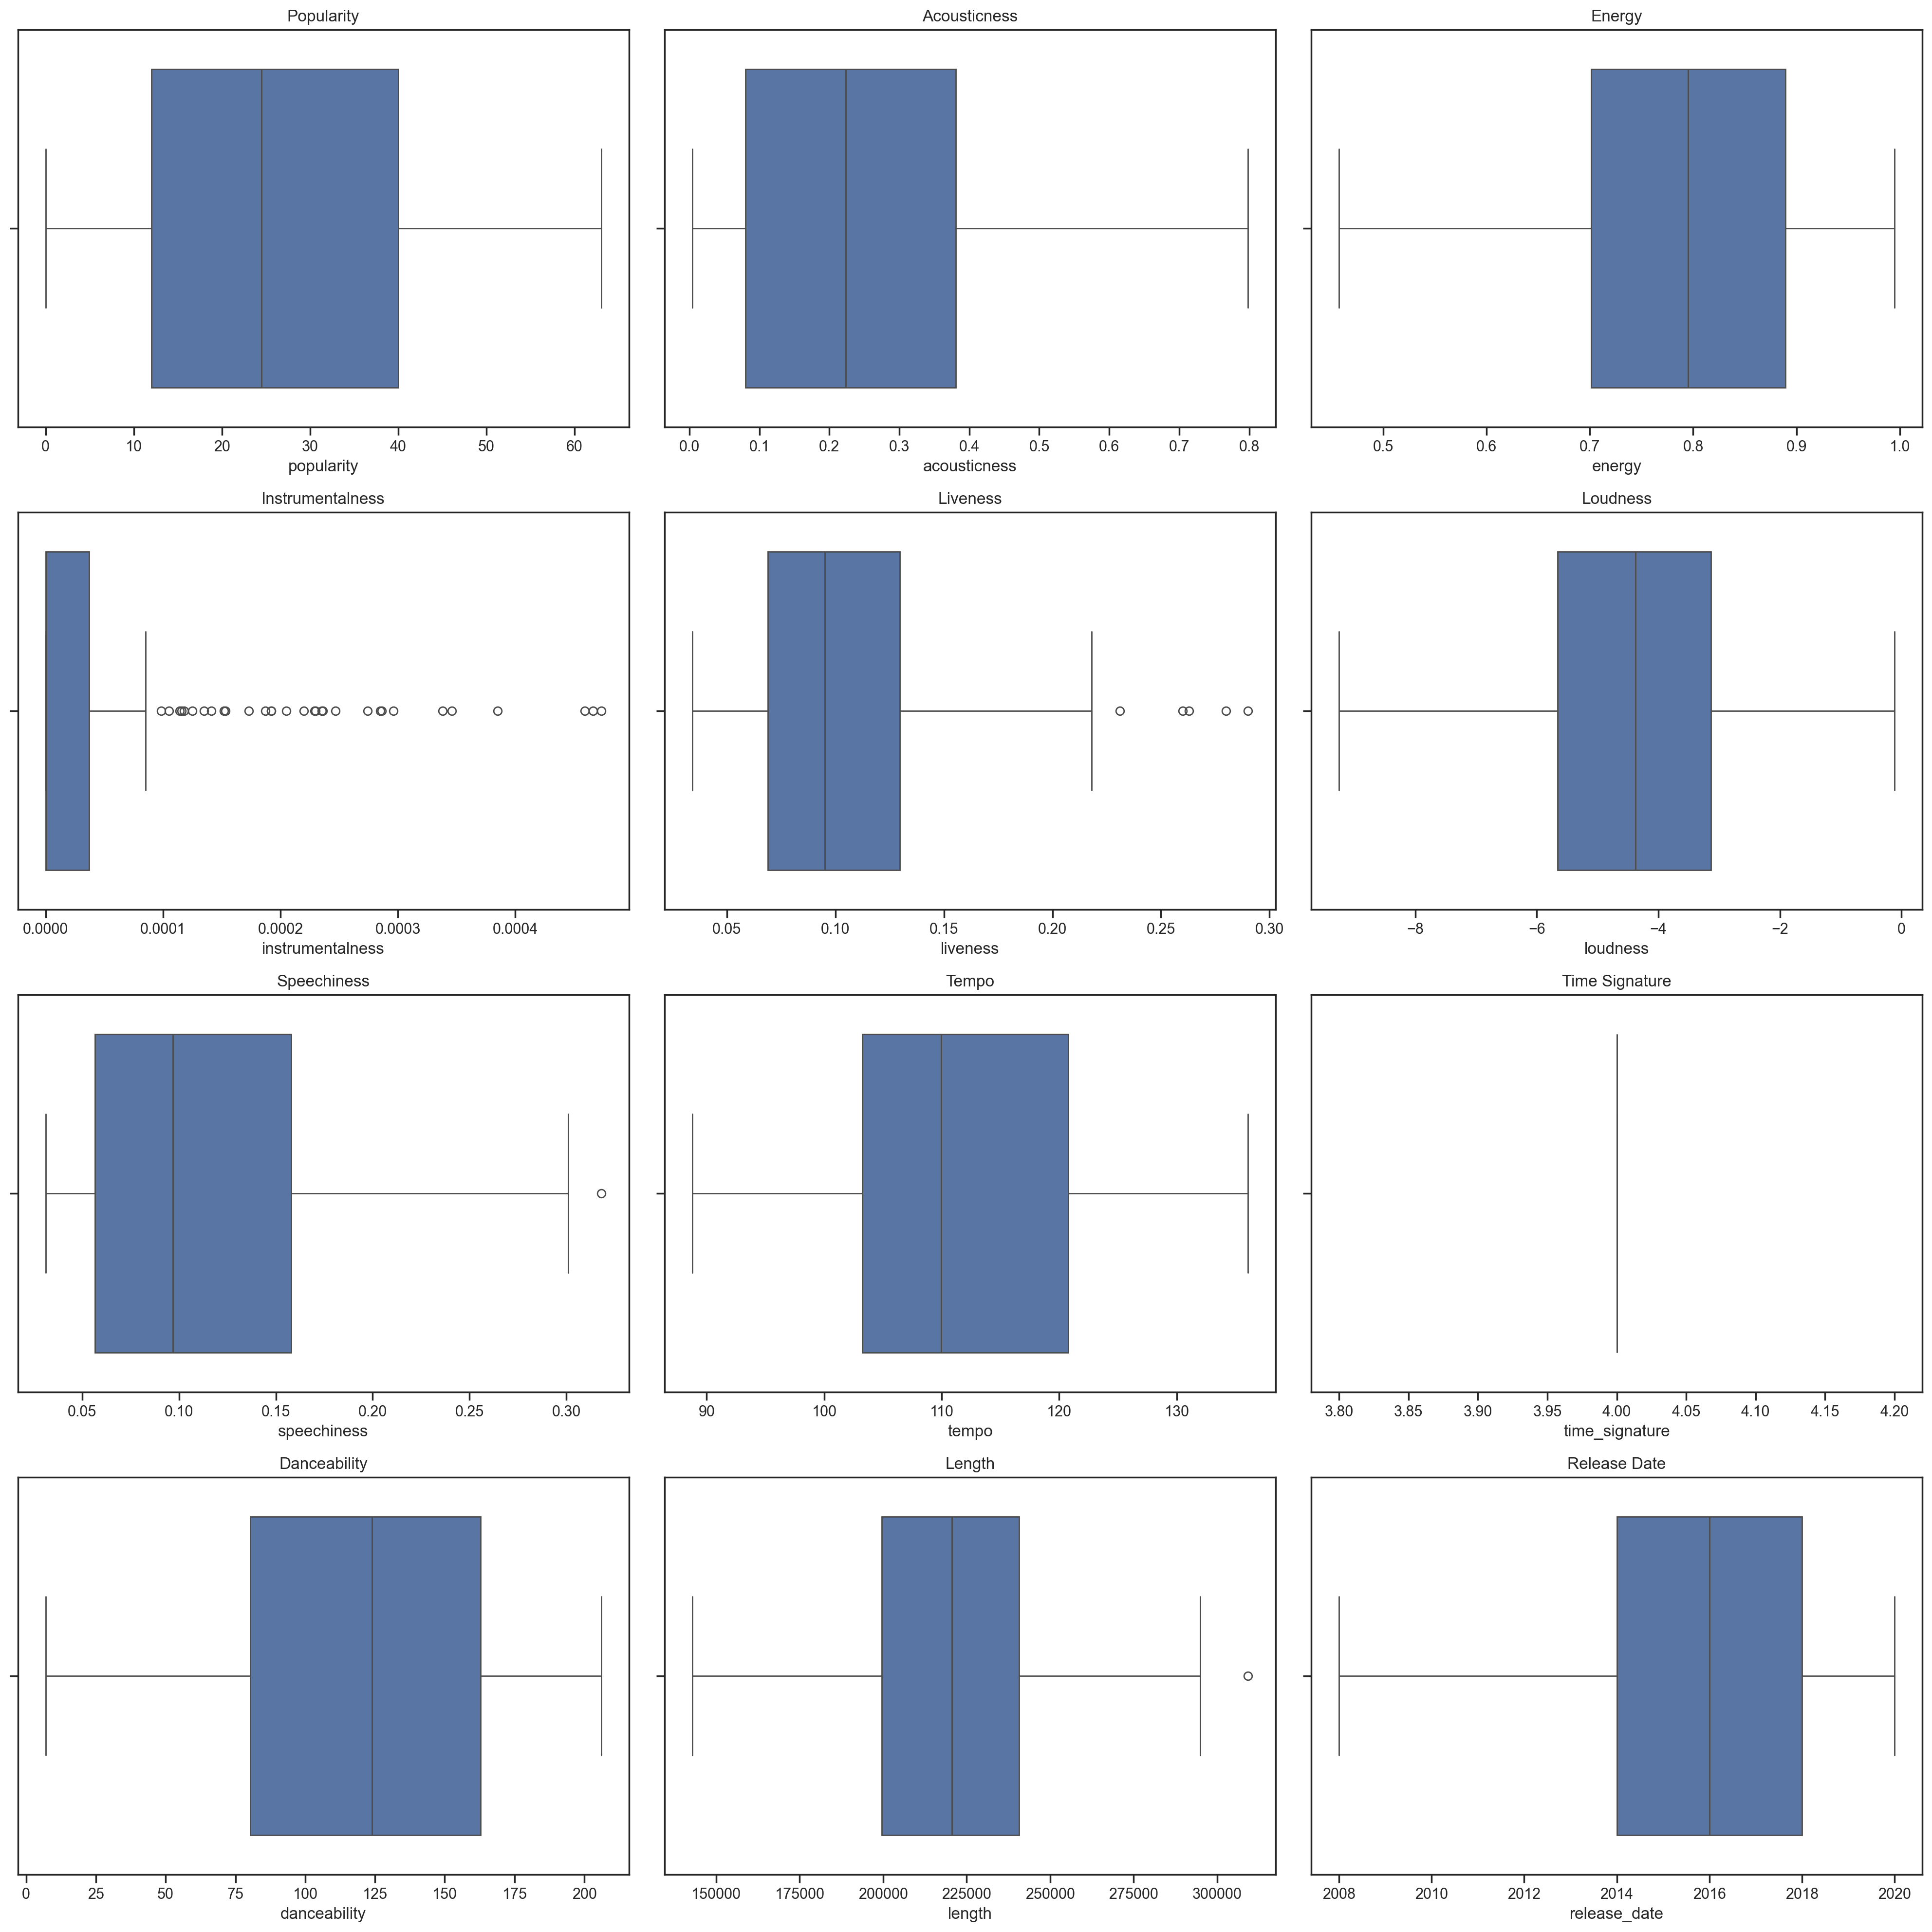

In [25]:
# 剔除异常值
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 绘制剔除异常值后的箱型图
plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4, 3, 1)
sns.boxplot(x='popularity', data=df)
plt.title('Popularity')

plt.subplot(4, 3, 2)
sns.boxplot(x='acousticness', data=df)
plt.title('Acousticness')

plt.subplot(4, 3, 3)
sns.boxplot(x='energy', data=df)
plt.title('Energy')

plt.subplot(4, 3, 4)
sns.boxplot(x='instrumentalness', data=df)
plt.title('Instrumentalness')

plt.subplot(4, 3, 5)
sns.boxplot(x='liveness', data=df)
plt.title('Liveness')

plt.subplot(4, 3, 6)
sns.boxplot(x='loudness', data=df)
plt.title('Loudness')

plt.subplot(4, 3, 7)
sns.boxplot(x='speechiness', data=df)
plt.title('Speechiness')

plt.subplot(4, 3, 8)
sns.boxplot(x='tempo', data=df)
plt.title('Tempo')

plt.subplot(4, 3, 9)
sns.boxplot(x='time_signature', data=df)
plt.title('Time Signature')

plt.subplot(4, 3, 10)
sns.boxplot(x='danceability', data=df)
plt.title('Danceability')

plt.subplot(4, 3, 11)
sns.boxplot(x='length', data=df)
plt.title('Length')

plt.subplot(4, 3, 12)
sns.boxplot(x='release_date', data=df)
plt.title('Release Date')

plt.tight_layout()
plt.show()

模型训练与精度评价

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()#创建一个编码器
 
X = df.loc[:,('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]#loc为Selection by Label函数，即为按标签取数据；将需要的标签数据取出作为X训练特征样本
 
y = df['artist_top_genre']#将艺术家流派作为Y验证模型精度标签
 
X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])#对文本数据进行标签化为数值格式
 
y = le.transform(y)#对文本数据进行标签化为数值格式

In [27]:
from sklearn.cluster import KMeans
 
nclusters = 3 #划分3中音乐类型
seed = 0 #选择随机初始化种子
 
km = KMeans(n_clusters=nclusters, random_state=seed)#一个random_state对应一个质心随机初始化的随机数种子。如果不指定随机数种子，则 sklearn中的KMeans并不会只选择一个随机模式扔出结果
km.fit(X)#对Kmeans模型进行训练
 
#使用训练好的模型进行预测
 
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([1, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2,
       2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2,
       2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2,
       1, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0,
       1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2,
       2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 2, 2, 1, 2,
       1, 2, 1, 1])

In [28]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)# metrics.silhouette_score函数用于计算轮廓系数
score

0.4355059018622337

模型调参

In [29]:

wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

K均值算法当簇数为3时，其inertia_参数效果较好

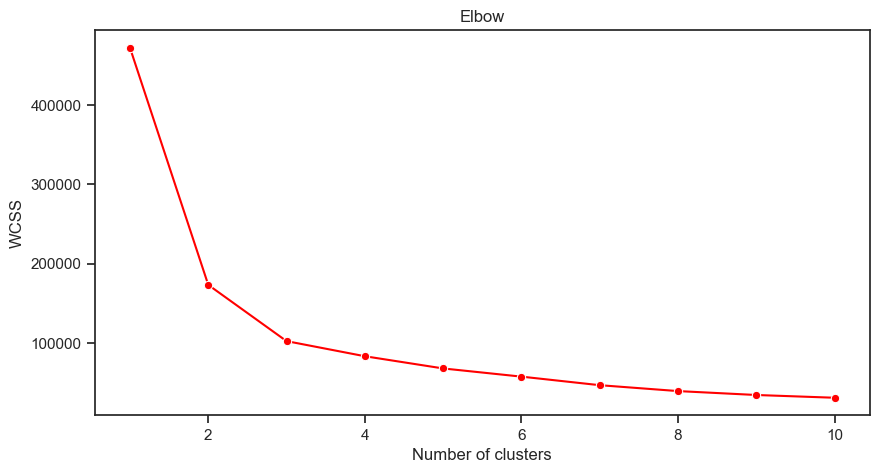

In [35]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

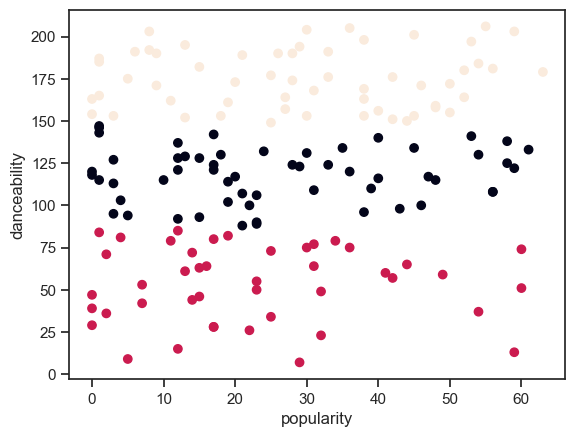

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)#设置聚类的簇（类别）数量
kmeans.fit(X)#对模型进行训练
labels = kmeans.predict(X)#输出预测值
plt.scatter(df['popularity'],df['danceability'],c = labels)#以人气为X轴，可舞蹈性为Y轴，标签为类别绘制散点图
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [37]:
labels = kmeans.labels_#提取出模型中样本的预测值labels
 
correct_labels = sum(y == labels)#统计预测正确的值
 
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
 
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 57 out of 158 samples were correctly labeled.
Accuracy score: 0.36
